<a href="https://colab.research.google.com/github/shyamilyh/DataScience_Projects_Portfolio/blob/main/Hotel_Booking_Cancellation_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("hotel_bookings.csv")
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,9/7/2017


##**Cleaning The Data**

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
#not available data
def data_clean(df):
    df.fillna(0,inplace = True) #zero imputation
    print(df.isnull().sum())

In [ ]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
list_cols = ["children", "adults", "babies"]

for i in list_cols:
    print(f"{i} has unique values as {df[i].unique()}")

children has unique values as [ 0.  1.  2. 10.  3.]
adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
babies has unique values as [ 0  1  2 10  9]


In [ ]:
#clean the data

filtered_data = (df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0) #noone came  dirty data

final_data = df[~filtered_data] #filter it out

In [ ]:
final_data.shape

(119210, 32)

#**Where do the guest come from? (Spatial Analysis)**

In [ ]:
country_wise_data =  final_data[final_data['is_canceled'] == 0]['country'].value_counts().reset_index()

country_wise_data.columns = ["Country", "No.of guests"]
country_wise_data


,Country,No.of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [ ]:
import plotly.express as px

In [ ]:
map_guests = px.choropleth(country_wise_data, locations = country_wise_data['Country'],
                           color = country_wise_data["No.of guests"],
                           hover_name = country_wise_data['Country'],
                           title = "Home country of guests"
                          )

map_guests.show()

#**How much do guests pay for a room per night?**

In [ ]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
final_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [ ]:
data = final_data[final_data["is_canceled"] == 0]

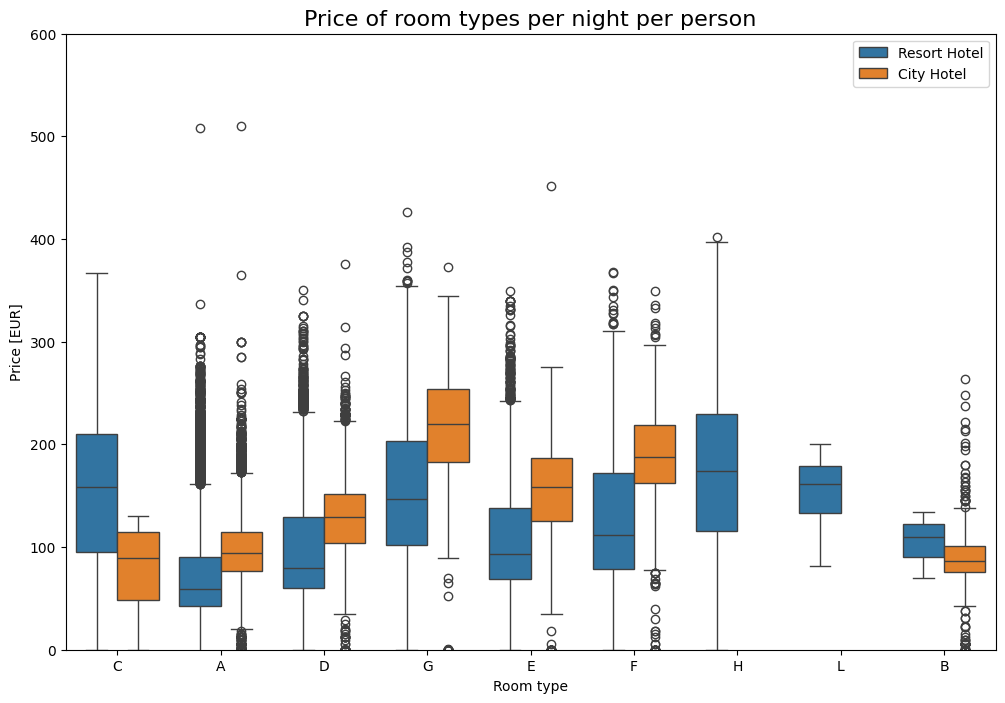

In [ ]:
#boxplot
plt.figure(figsize = (12,8)) #default

sns.boxplot(x = "reserved_room_type",
           y = "adr",
           hue = "hotel", data = data)

plt.title("Price of room types per night per person", fontsize = 16)
plt.xlabel("Room type")
plt.ylabel("Price [EUR]")
plt.legend(loc = "upper right")
plt.ylim(0,600)
plt.show()

#**How does the price per night (adr) vary over the year?**

In [ ]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
#Calculate the average adr for each month for both hotel types:

data_resort = final_data[(final_data["hotel"] == "Resort Hotel") & (final_data["is_canceled"] == 0)]

data_city = final_data[(final_data["hotel"] == "City Hotel") & (final_data["is_canceled"] == 0)]

#how many people came to resort hotel per month
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()

#how many people came to city hotel per month
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [ ]:
#Merge the results and rename the columns:

final = resort_hotel.merge(city_hotel, on = "arrival_date_month")

final.columns = ["month", "price_for_resort_hotel", "price_for_city_hotel"]

final

,month,price_for_resort_hotel,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [ ]:
#Sort the months chronologically

from calendar import month_name

def sort_month(df, colname):
    month_dict = { j:i for i, j in enumerate(month_name) } #dictionary comprehension
    df["month_num"] = df[colname].apply(lambda x: month_dict[x])
    return df.sort_values(by = "month_num").reset_index().drop(['index', 'month_num'], axis = 1)

In [ ]:
sort_month(final, "month")

,month,price_for_resort_hotel,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


<Axes: xlabel='month'>

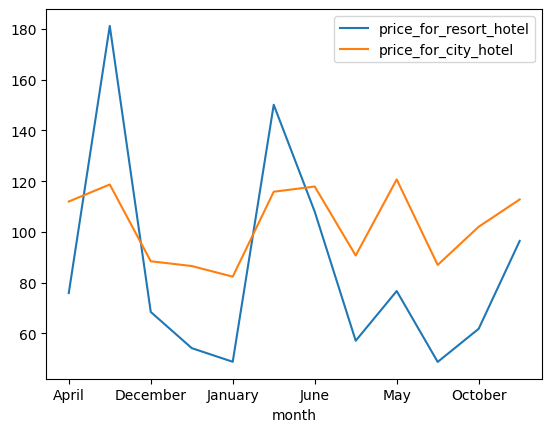

In [ ]:
#Plot the result

final.plot(kind = "line", x = "month", y = ['price_for_resort_hotel','price_for_city_hotel'])

#**Which are the most busy month or in which months Guests are high?**

In [ ]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
#Calculate the number of guests for each month for Resort Hotel

rush_resort = data_resort["arrival_date_month"].value_counts().reset_index()
rush_resort.columns = ["month", "no of guests"]

rush_resort

,month,no of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [ ]:
#Calculate the number of guests for each month for City Hotel

rush_city = data_city["arrival_date_month"].value_counts().reset_index()
rush_city.columns = ["month", "no of guests"]

rush_city

,month,no of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [ ]:
#merge two data frame rush_resort , rush_city and rename the columns

final_rush = rush_resort.merge(rush_city, on = "month")

final_rush.columns = ["month", "no of guests in resort hotel", "no of guests in city hotel"]

final_rush

,month,no of guests in resort hotel,no of guests in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [ ]:
#Sort the months

final_rush = sort_month(final_rush, "month")
final_rush

,month,no of guests in resort hotel,no of guests in city hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


<Axes: xlabel='month'>

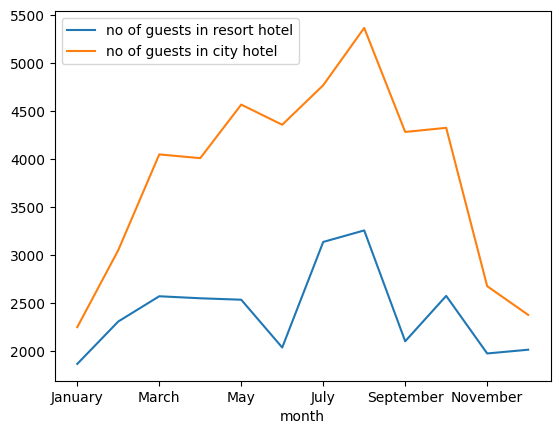

In [ ]:
#plot line plot month vs no of guests

final_rush.plot(kind = "line", x = "month",
                y = ["no of guests in resort hotel","no of guests in city hotel" ])

#**How long do people stay at the hotels?**

In [ ]:
#Filter out canceled bookings

filter_condition = final_data['is_canceled'] == 0

clean_data = final_data[filter_condition]
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
#Calculate total nights stayed

clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"]

clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,2


In [ ]:
#Group data by total nights and hotel type, then count occurrences

stay = clean_data.groupby(["total_nights", "hotel"]).agg('count').reset_index()

stay = stay.iloc[:, 0:3]
stay

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


In [ ]:
stay = stay.rename(columns = {'is_canceled': 'Number of stays'})

In [ ]:
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


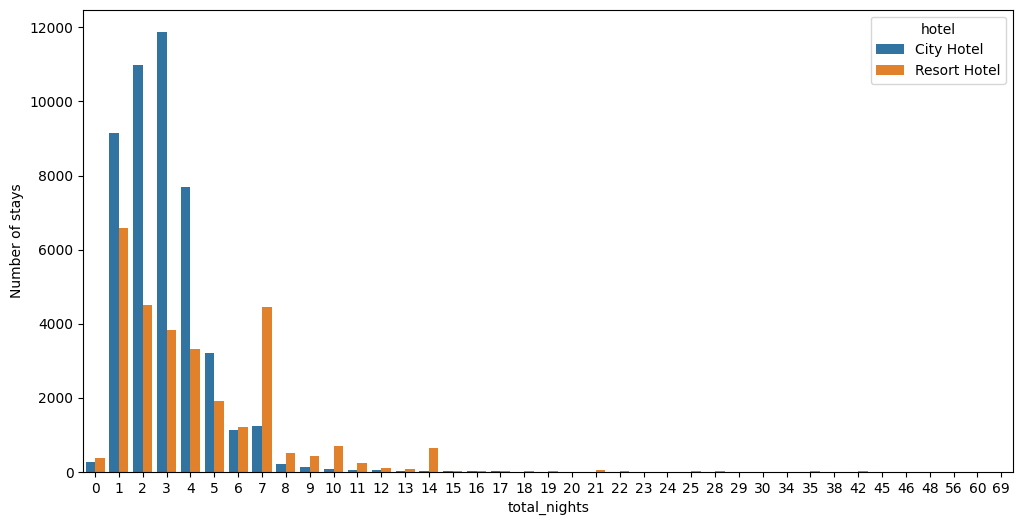

In [ ]:
#plot the barplot

plt.figure(figsize=(12, 6))
sns.barplot(x = "total_nights", y = "Number of stays", hue = "hotel",
           hue_order = ["City Hotel", "Resort Hotel"], data = stay)
plt.show()

#**Select Important Numerical Features using Correlation**

In [ ]:
# Convert relevant columns to numeric type before calculating correlation.
final_data['hotel'] = final_data['hotel'].astype('category').cat.codes

# Convert 'arrival_date_month' to numeric representation
final_data['arrival_date_month'] = final_data['arrival_date_month'].astype('category').cat.codes

# Exclude non-numeric columns from correlation calculation
numerical_data = final_data.select_dtypes(include=['number'])

correlation = numerical_data.corr()
correlation

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
hotel,1.000000,-0.137082,-0.075970,-0.035176,-0.035453,-0.001241,0.001678,0.187816,0.235955,0.010571,...,0.052526,0.012261,0.004467,0.076598,0.651293,0.105070,-0.072725,-0.098522,0.218961,0.043478
is_canceled,-0.137082,1.000000,0.292876,0.016622,-0.001269,0.008315,-0.005948,-0.001323,0.025542,0.058182,...,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,-0.075970,0.292876,1.000000,0.040334,0.086345,0.127046,0.002306,0.085985,0.166892,0.117575,...,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,-0.035176,0.016622,0.040334,1.000000,-0.252041,-0.540373,-0.000121,0.021694,0.031203,0.030266,...,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_month,-0.035453,-0.001269,0.086345,-0.252041,1.000000,0.302470,-0.017832,-0.032159,-0.026075,-0.058859,...,-0.002422,0.040459,-0.003936,-0.018213,-0.041064,0.029108,0.048426,-0.109457,-0.018689,-0.052924
arrival_date_week_number,-0.001241,0.008315,0.127046,-0.540373,0.302470,1.000000,0.066572,0.018629,0.016047,0.026567,...,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,0.001678,-0.005948,0.002306,-0.000121,-0.017832,0.066572,1.000000,-0.016225,-0.028362,-0.001754,...,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,0.187816,-0.001323,0.085985,0.021694,-0.032159,0.018629,-0.016225,1.000000,0.494175,0.094759,...,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.235955,0.025542,0.166892,0.031203,-0.026075,0.016047,-0.028362,0.494175,1.000000,0.096214,...,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.010571,0.058182,0.117575,0.030266,-0.058859,0.026567,-0.001754,0.094759,0.096214,1.000000,...,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353


In [ ]:
#Focus on correlation with the target variable (is_canceled)

correlation = correlation["is_canceled"][1:]

In [ ]:
#Sort features by absolute correlation

correlation.abs().sort_values(ascending = False)

,is_canceled
is_canceled,1.000000
lead_time,0.292876
total_of_special_requests,0.234877
required_car_parking_spaces,0.195701
booking_changes,0.144832
previous_cancellations,0.110139
is_repeated_guest,0.083745
company,0.083594
adults,0.058182
previous_bookings_not_canceled,0.057365


In [ ]:
#Define a list of features to exclude

list_not = ["days_in_waiting_list", "arrival_date_year"]

In [ ]:
#Create a list of numerical features to keep

num_features = [col for col in final_data.columns if final_data[col].dtype != "O" and col not in list_not]  #numerical one

In [ ]:
num_features

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

#**Select important Categorical features**

In [ ]:
final_data["reservation_status"].value_counts()

,count
reservation_status,
Check-Out,75011
Canceled,42993
No-Show,1206


In [ ]:
final_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
cat_not = ["country", "reservation_status", "booking_changes", "assigned_room_type", "days_in_waiting_list" ]

In [ ]:
cat_features = [col for col in final_data.columns
                if final_data[col].dtype == "O" and col not in cat_not]

In [ ]:
print(cat_features)

['meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'reservation_status_date']


In [ ]:
print(num_features)

['hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [ ]:
data_cat = final_data[cat_features]

In [ ]:
data_cat.head()

,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
1,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
2,BB,Direct,Direct,A,No Deposit,Transient,7/2/2015
3,BB,Corporate,Corporate,A,No Deposit,Transient,7/2/2015
4,BB,Online TA,TA/TO,A,No Deposit,Transient,7/3/2015


In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

data_cat["reservation_status_date"] = pd.to_datetime(data_cat["reservation_status_date"])


In [ ]:
data_cat["year"] = data_cat["reservation_status_date"].dt.year

data_cat["month"] = data_cat["reservation_status_date"].dt.month

data_cat["day"] = data_cat["reservation_status_date"].dt.day

In [ ]:
data_cat.head()

,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3


In [ ]:
data_cat.drop("reservation_status_date", axis = 1, inplace = True)

In [ ]:
data_cat.head()

,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


# **Feature Encoding**

## **Mean Encoding Technique**

In [ ]:
data_cat.columns

Index(['meal', 'market_segment', 'distribution_channel', 'reserved_room_type',
       'deposit_type', 'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
data_cat["cancellation"] = final_data["is_canceled"]

In [ ]:
data_cat

,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
1,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
2,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2,0
3,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2,0
4,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3,0
...,...,...,...,...,...,...,...,...,...,...
119385,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017,9,6,0
119386,BB,Online TA,TA/TO,E,No Deposit,Transient,2017,9,7,0
119387,BB,Online TA,TA/TO,D,No Deposit,Transient,2017,9,7,0
119388,BB,Online TA,TA/TO,A,No Deposit,Transient,2017,9,7,0


In [ ]:
def mean_encode(df, col, mean_col):
    df_dict = df.groupby([col])[mean_col].mean().to_dict()
    df[col] = df[col].map(df_dict)
    return df

for col in data_cat.columns[0:8]:
    data_cat = mean_encode(data_cat, col, "cancellation")

In [ ]:
data_cat.drop(["cancellation"], axis = 1, inplace = True)

In [ ]:
data_cat

,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,0.460402,0.361283,1
1,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,0.460402,0.361283,1
2,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,0.460402,0.361283,2
3,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,0.460402,0.361283,2
4,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,0.460402,0.361283,3
...,...,...,...,...,...,...,...,...,...
119385,0.374106,0.343313,0.410598,0.391567,0.28402,0.407864,0.305844,0.284847,6
119386,0.374106,0.367590,0.410598,0.292683,0.28402,0.407864,0.305844,0.284847,7
119387,0.374106,0.367590,0.410598,0.318108,0.28402,0.407864,0.305844,0.284847,7
119388,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,0.305844,0.284847,7


# **Preparing Our Data**

In [ ]:
num_data = final_data[num_features] #numerical data

cat_data = data_cat #categorical data

dataframe = pd.concat([num_data, cat_data], axis = 1) #final dataframe

In [ ]:
dataframe.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,total_of_special_requests,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,1,0,342,5,27,1,0,0,2,0.0,...,0,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,0.460402,0.361283,1
1,1,0,737,5,27,1,0,0,2,0.0,...,0,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,0.460402,0.361283,1
2,1,0,7,5,27,1,0,1,1,0.0,...,0,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,0.460402,0.361283,2
3,1,0,13,5,27,1,0,1,1,0.0,...,0,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,0.460402,0.361283,2
4,1,0,14,5,27,1,0,2,2,0.0,...,1,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,0.460402,0.361283,3


# **Handle the outliers**

In [ ]:
dataframe.describe()["adr"]

,adr
count,119210.000000
mean,101.969092
std,50.434007
min,-6.380000
25%,69.500000
50%,94.950000
75%,126.000000
max,5400.000000


<Axes: xlabel='lead_time', ylabel='Density'>

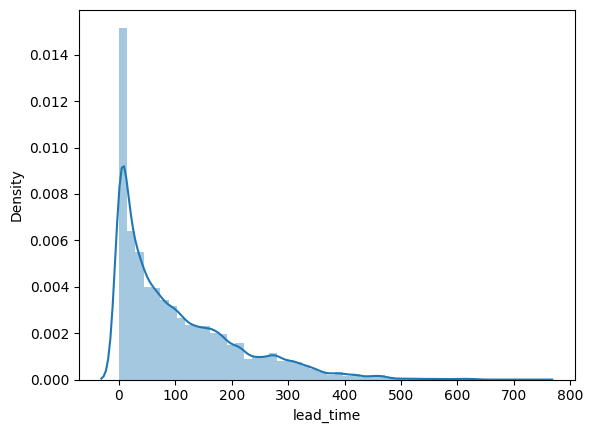

In [ ]:
#using seaborn library
sns.distplot(dataframe["lead_time"])

In [ ]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

In [ ]:
handle_outlier("lead_time")

<Axes: xlabel='lead_time', ylabel='Density'>

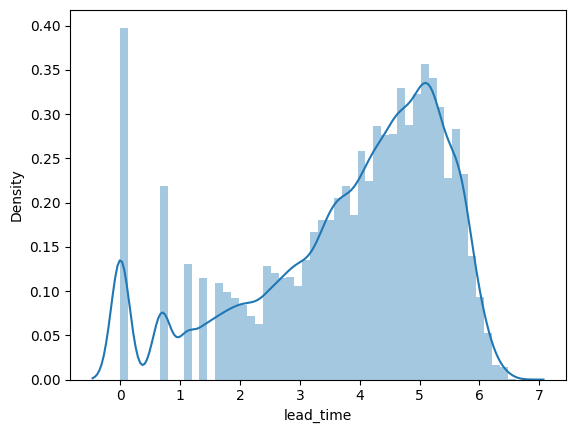

In [ ]:
sns.distplot(dataframe["lead_time"].dropna())

<Axes: xlabel='adr', ylabel='Density'>

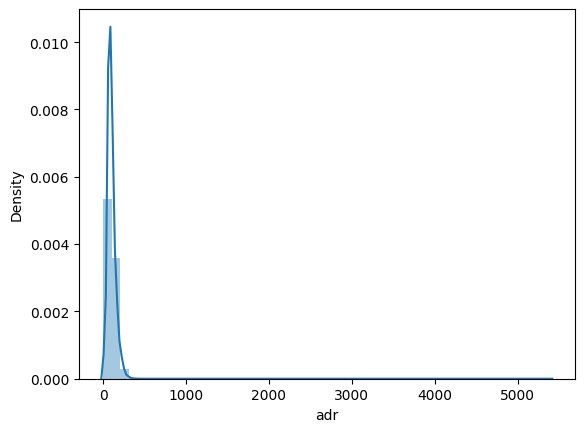

In [ ]:
sns.distplot(dataframe["adr"])

In [ ]:
handle_outlier("adr")

In [ ]:
dataframe.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0


In [ ]:
dataframe.dropna(inplace = True)

# **Feature Importance**

In [ ]:
##separate dependent and independent variables

y = dataframe["is_canceled"] #dependent variable

X = dataframe.drop("is_canceled", axis = 1) #independent

In [ ]:
X.columns

Index(['hotel', 'lead_time', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'meal', 'market_segment', 'distribution_channel', 'reserved_room_type',
       'deposit_type', 'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))

In [ ]:
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feature_sel_model.get_support()

array([False,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True, False, False, False,
        True])

In [ ]:
cols = X.columns
print(cols)

Index(['hotel', 'lead_time', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'meal', 'market_segment', 'distribution_channel', 'reserved_room_type',
       'deposit_type', 'customer_type', 'year', 'month', 'day'],
      dtype='object')


In [ ]:
selected_feature = cols[(feature_sel_model.get_support())]

In [ ]:
selected_feature

Index(['lead_time', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'adults',
       'children', 'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'deposit_type', 'day'],
      dtype='object')

In [ ]:
print(f"Total features {X.shape[1]}")

Total features 28


In [ ]:
print(f"Selected features {len(selected_feature)}")

Selected features 17


In [ ]:
X.columns

Index(['hotel', 'lead_time', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'meal', 'market_segment', 'distribution_channel', 'reserved_room_type',
       'deposit_type', 'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
X = X[selected_feature]

In [ ]:
X.columns

Index(['lead_time', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'adults',
       'children', 'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'deposit_type', 'day'],
      dtype='object')

In [ ]:
X.head()

,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,adults,children,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests,deposit_type,day
0,5.837730,5,27,1,0,2,0.0,0,0,3,0.0,0.0,0.000000,0,0,0.28402,1
1,6.603944,5,27,1,0,2,0.0,0,0,4,0.0,0.0,0.000000,0,0,0.28402,1
2,2.079442,5,27,1,1,1,0.0,0,0,0,0.0,0.0,4.330733,0,0,0.28402,2
3,2.639057,5,27,1,1,1,0.0,0,0,0,304.0,0.0,4.330733,0,0,0.28402,2
4,2.708050,5,27,1,2,2,0.0,0,0,0,240.0,0.0,4.595120,0,1,0.28402,3


In [ ]:
y.head()

,is_canceled
0,0
1,0
2,0
3,0
4,0


# **Splitting the data and model building**

In [ ]:
# X -> independent variables

# y -> dependent variable

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 45)

# **We are implementing different classification algorithms**

## 1. Logistic Regression
## 2. Naive Bayes
## 3. Random Forest
## 4. Decision Tree
## 5. KNN

# **Implement Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train) #training of the model

LogisticRegression()

In [ ]:
y_pred = logistic_model.predict(x_test) #prediction by model

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[15861,  2821],
       [ 4507,  6614]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.7541187128812535

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
models = []

models.append(("Naive Bayes", GaussianNB()))
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier(n_neighbors = 5)))

In [ ]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)

    #make a predictions
    predictions = model.predict(x_test)

    #evaluate a model
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions, y_test))

    print("\n")

Naive Bayes
[[ 8255  1124]
 [10427  9997]]
0.6124215682984935


Random Forest
[[18167  1862]
 [  515  9259]]
0.9202429285642385


Decision Tree
[[17007  1720]
 [ 1675  9401]]
0.8860852934268362


KNN
[[18421  1584]
 [  261  9537]]
0.9380934805220951




## Analysis of Model Results:

Trained and evaluated four classification models to predict hotel booking cancellations: Logistic Regression, Naive Bayes, Random Forest, Decision Tree, and KNN. Here's a breakdown of their performance based on the accuracy scores:

**Logistic Regression:** Achieved an accuracy of approximately 75.4%. This is a decent baseline, but other models performed significantly better.

**Naive Bayes:** Had the lowest accuracy among all models, at around 61.2%. The confusion matrix shows a high number of false positives (predicting cancellation when it didn't happen) and false negatives (predicting no cancellation when it did happen).

**Random Forest:** Showed a strong performance with an accuracy of approximately 92.0%. The confusion matrix indicates a good balance between correctly identified cancellations and non-cancellations.

**Decision Tree:** Performed well with an accuracy of around 88.6%. While better than Logistic Regression and Naive Bayes, it was slightly less accurate than Random Forest and KNN.

**KNN (K-Nearest Neighbors):** Achieved the highest accuracy among all models, at approximately 93.8%. The confusion matrix shows a high number of true positives and true negatives, indicating its effectiveness in correctly classifying bookings.
Conclusion:

Based on the accuracy scores, the KNN model performed the best in predicting hotel booking cancellations, followed closely by the Random Forest model. The Logistic Regression and Naive Bayes models were less effective for this dataset.

The results demonstrate that machine learning models can effectively predict hotel booking cancellations, with the KNN and Random Forest algorithms showing particularly strong performance on this dataset. These findings can be valuable for hotels to better manage resources, optimize pricing strategies, and reduce revenue loss due to cancellations.